<a href="https://colab.research.google.com/github/Valentinhp/TRABAJOS-LIZ/blob/main/NYHouseDataBase_(1)_comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Esta sección importa las bibliotecas necesarias para el análisis de datos y la creación de modelos:
- Pandas y NumPy para manipulación de datos
- Matplotlib y Seaborn para visualización
- Scikit-learn para modelado y evaluación de machine learning

In [ ]:
# Librerías para manejo de datos
import pandas as pd  # Trabajar con DataFrames y manejar datos tipo tabla
import numpy as np  # Operaciones matemáticas y manejo de arrays

# Modelos estadísticos y machine learning
import statsmodels.api as sm  # Modelos estadísticos avanzados (como regresión)
from sklearn.model_selection import train_test_split  # Separar datos en entrenamiento/prueba
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn.ensemble import RandomForestRegressor  # Modelo avanzado con árboles de decisión

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler  # Normalización de datos
from sklearn.preprocessing import OneHotEncoder  # Codificación de variables categóricas

# Métricas para evaluar el modelo
from sklearn.metrics import mean_absolute_error  # Error absoluto medio
from sklearn.metrics import mean_squared_error  # Error cuadrático medio
from sklearn.metrics import r2_score  # Coeficiente de determinación (R^2)

# Visualización
import matplotlib.pyplot as plt  # Gráficas básicas
import seaborn as sns  # Visualizaciones más detalladas



Aquí se carga el conjunto de datos de casas de Nueva York y se realiza una exploración inicial:
1. Se muestra las primeras filas del dfFrame
2. Se obtiene información sobre las columnas y tipos de datos
3. Se generan estadísticas descriptivas de las variables numéricas

In [ ]:
# Cargamos la base de datos desde un enlace
df = pd.read_csv('https://raw.githubusercontent.com/Valentinhp/TRABAJOS-LIZ/refs/heads/main/NY-House-dfset.csv', sep=',')

# Alternativa: Cargar la base de datos desde una ruta local
# df = pd.read_csv("C:/Users/Lizeth Solano Romo/OneDrive - Universidad Autónoma de Aguascalientes/2024/MATERIAS/agosto-diciembre/LITC/7o/Ejercicios Phyton/NY-House-dfset.csv")


In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

# Realizamos el analisis exploratorio:
##Conteo de categorias

In [ ]:
# Imprimir la cantidad de veces que aparece cada valor en diferentes columnas
print(df["BROKERTITLE"].value_counts())  # Conteo de títulos de brokers
print(df["TYPE"].value_counts())  # Conteo de tipos de propiedad
print(df["STATE"].value_counts())  # Conteo de estados
print(df["LOCALITY"].value_counts())  # Conteo de localidades
print(df["PROPERTYSQFT"].value_counts())  # Conteo de tamaños de propiedad en pies cuadrados
print(df["SUBLOCALITY"].value_counts())  # Conteo de sublocalidades


BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
                                                ... 
Brokered by Gerard R Desgranges                    1
Brokered by Property Professional Realty           1
Brokered by Mark Murphy Properties                 1
Brokered by S Sharf Realty Inc                     1
Brokered by New York Way Real Estate Corp          1
Name: count, Length: 1036, dtype: int64
TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for

##descripcion de variables numericas:

In [ ]:
print(df[["PRICE","BEDS","BATH","PROPERTYSQFT"]].describe())

              PRICE         BEDS         BATH  PROPERTYSQFT
count  4.801000e+03  4801.000000  4801.000000   4801.000000
mean   2.356940e+06     3.356801     2.373861   2184.207862
std    3.135525e+07     2.602315     1.946962   2377.140894
min    2.494000e+03     1.000000     0.000000    230.000000
25%    4.990000e+05     2.000000     1.000000   1200.000000
50%    8.250000e+05     3.000000     2.000000   2184.207862
75%    1.495000e+06     4.000000     3.000000   2184.207862
max    2.147484e+09    50.000000    50.000000  65535.000000


#Transformar categorias con menos de 10 registros a una nueva:
## BROKERTITLE,TYPE,STATE,CP,STATE_2,CODIGO_POSTAL,LOCALLITY, SUBLOCALLITY

In [ ]:
# Filtrar valores frecuentes en BROKERTITLE (mínimo 10) y reemplazar los demás con "No se especifica"
BROKERTITLE_conteo = df["BROKERTITLE"].value_counts()
BROKERTITLE_conservar = BROKERTITLE_conteo[BROKERTITLE_conteo >= 10].index.to_list()
df["BROKERTITLE"] = np.where(df["BROKERTITLE"].isin(BROKERTITLE_conservar), df["BROKERTITLE"], "No se especifica")

# Filtrar valores frecuentes en TYPE (mínimo 10) y reemplazar los demás con "No se especifica"
TYPE_conteo = df["TYPE"].value_counts()
TYPE_conservar = TYPE_conteo[TYPE_conteo >= 10].index.to_list()
df["TYPE"] = np.where(df["TYPE"].isin(TYPE_conservar), df["TYPE"], "No se especifica")

# Extraer el estado (antes de la coma) y el código postal (último número)
df["STATE_2"] = df["STATE"].str.extract("^([^,]+)")
df["codigo_postal"] = df["STATE"].str.extractall("(\d+)").groupby(level=0).apply(lambda x: x.iloc[-1])

# Filtrar valores frecuentes en STATE_2 (mínimo 10) y reemplazar los demás con "No se especifica"
STATE_2_conteo = df["STATE_2"].value_counts()
STATE_2_conservar = STATE_2_conteo[STATE_2_conteo >= 10].index.to_list()
df["STATE_2"] = np.where(df["STATE_2"].isin(STATE_2_conservar), df["STATE_2"], "No se especifica")

# Filtrar códigos postales frecuentes (mínimo 10) y reemplazar los demás con "No se especifica"
codigo_postal_conteo = df["codigo_postal"].value_counts()
codigo_postal_conservar = codigo_postal_conteo[codigo_postal_conteo >= 10].index.to_list()
df["codigo_postal"] = np.where(df["codigo_postal"].isin(codigo_postal_conservar), df["codigo_postal"], "No se especifica")

# Filtrar valores frecuentes en LOCALITY (mínimo 10) y reemplazar los demás con "No se especifica"
LOCALITY_conteo = df["LOCALITY"].value_counts()
LOCALITY_conservar = LOCALITY_conteo[LOCALITY_conteo >= 10].index.to_list()
df["LOCALITY"] = np.where(df["LOCALITY"].isin(LOCALITY_conservar), df["LOCALITY"], "No se especifica")

# Filtrar valores frecuentes en SUBLOCALITY (mínimo 10) y reemplazar los demás con "No se especifica"
SUBLOCALITY_conteo = df["SUBLOCALITY"].value_counts()
SUBLOCALITY_conservar = SUBLOCALITY_conteo[SUBLOCALITY_conteo >= 10].index.to_list()
df["SUBLOCALITY"] = np.where(df["SUBLOCALITY"].isin(SUBLOCALITY_conservar), df["SUBLOCALITY"], "No se especifica")


#TABLA DESCRIPTIVA:

In [ ]:
# Crear una tabla descriptiva agrupando por TYPE, STATE_2, codigo_postal, LOCALITY y SUBLOCALITY
Tabla_Descriptiva_Final = df.groupby(['TYPE', 'STATE_2', 'codigo_postal', 'LOCALITY', 'SUBLOCALITY']).agg(
    CONTEO=('TYPE', 'count'),  # Conteo de propiedades por grupo
    PROMEDIO_PRICE=('PRICE', 'mean'),  # Promedio del precio
    DESVIACION_PRICE=('PRICE', 'std'),  # Desviación estándar del precio
    PROMEDIO_BEDS=('BEDS', 'mean'),  # Promedio de habitaciones
    DESVIACION_BEDS=('BEDS', 'std'),  # Desviación estándar de habitaciones
    PROMEDIO_BATH=('BATH', 'mean'),  # Promedio de baños
    DESVIACION_BATH=('BATH', 'std'),  # Desviación estándar de baños
    PROMEDIO_PROPERTYSQFT=('PROPERTYSQFT', 'mean'),  # Promedio del tamaño en pies cuadrados
    DESVIACION_PROPERTYSQFT=('PROPERTYSQFT', 'std')  # Desviación estándar del tamaño en pies cuadrados
).reset_index()


In [ ]:
print(Tabla_Descriptiva_Final)

                    TYPE        STATE_2 codigo_postal       LOCALITY  \
0         Co-op for sale        Astoria         11101  Queens County   
1         Co-op for sale        Astoria         11105  Queens County   
2         Co-op for sale        Astoria         11106  Queens County   
3         Co-op for sale        Bayside         11360   Kings County   
4         Co-op for sale        Bayside         11360  Queens County   
...                  ...            ...           ...            ...   
1174  Townhouse for sale  Staten Island         10309       New York   
1175  Townhouse for sale  Staten Island         10310       New York   
1176  Townhouse for sale  Staten Island         10312       New York   
1177  Townhouse for sale  Staten Island         10314       New York   
1178  Townhouse for sale       Woodside         11377       New York   

          SUBLOCALITY  CONTEO  PROMEDIO_PRICE  DESVIACION_PRICE  \
0              Queens       2   270000.000000          0.000000   
1

Elimina los datos nulos de la base de datos

In [ ]:
df = df.dropna()


#Modelo


### Gráfico de dispersión que muestra la relación entre el tamaño y el precio de venta

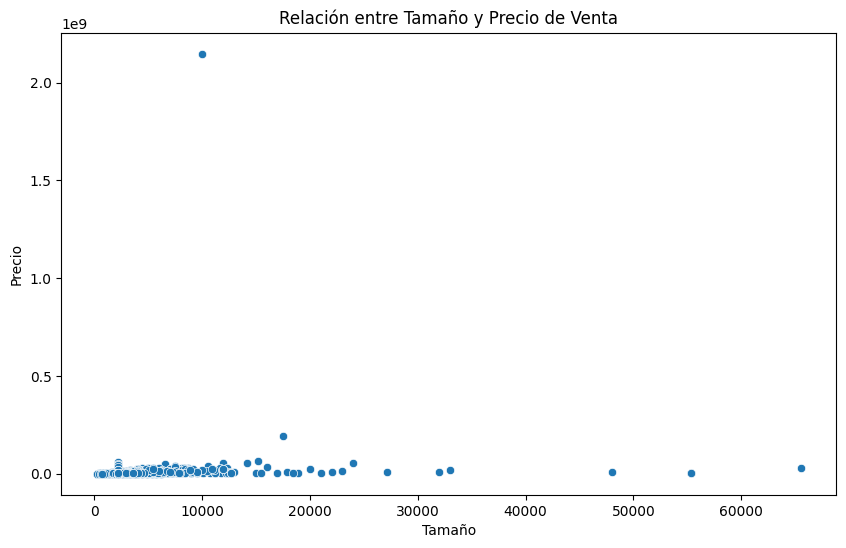

In [ ]:
# Graficar la relación entre el tamaño de la propiedad y el precio de venta
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df)  # Gráfica de dispersión
plt.title('Relación entre Tamaño y Precio de Venta')  # Título
plt.xlabel('Tamaño')  # Etiqueta del eje X
plt.ylabel('Precio')  # Etiqueta del eje Y
plt.show()  # Mostrar la gráfica


La gráfica muestra la relación entre tamaño y precio en propiedades, la mayoría son chicas y baratas, concentrándose cerca del origen, pero hay un punto raro con un precio de casi 2 mil millones que se sale de la norma, no se ve que el precio aumente claramente con el tamaño, ya que hay propiedades grandes que no cuestan tanto, esto indica que puede haber otros factores como la ubicación afectando los precios, además, este valor extremo distorsiona la gráfica, así que sería bueno analizarlo aparte o usar una escala logarítmica para ver mejor la distribución

Se propone un modelo y su evaluación:
1. Se divide el conjunto de datos en entrenamiento y prueba.
2. Se crea y entrena un modelo de regresión lineal.
3. Se hacen predicciones y se evalúa el rendimiento del modelo.

La ***regresión lineal*** es una técnica estadística fundamental utilizada para modelar la relación entre variables y hacer predicciones.

Es un método estadístico que busca establecer una relación lineal entre una variable dependiente (Y) y una o más variables independientes (X). En su forma más simple, se representa mediante la ecuación:

Y = β₀ + β₁X + ε

Donde:

β₀ es la intersección con el eje Y

β₁ es la pendiente de la línea

ε es el término de error


Sirve para:

- **Predicción:** Permite hacer pronósticos sobre la variable dependiente basándose en los valores de las variables independientes.
- **Análisis de relaciones:** Ayuda a entender cómo cambia la variable dependiente cuando se modifican las variables independientes.
- **Identificación de tendencias:** Permite detectar patrones y tendencias en los datos.
- **Cuantificación de impactos:** Mide el efecto que tienen las variables independientes sobre la variable dependiente.

**En qué casos se utiliza**

La regresión lineal se aplica en diversos campos y situaciones, como:
- Economía y finanzas: Para predecir ventas, analizar el impacto de variables económicas, o estimar el valor de activos.
- Ciencias sociales: En estudios que buscan relacionar factores socioeconómicos con diversos resultados.
- Medicina: Para analizar la relación entre dosis de medicamentos y respuestas fisiológicas.
- Marketing: En la predicción de comportamientos de consumo o efectividad de campañas publicitarias.
- Ingeniería: Para modelar relaciones entre variables en sistemas físicos.
- Ciencias ambientales: En el estudio de fenómenos climáticos o ecológicos.
- Recursos humanos: Para analizar factores que influyen en el desempeño o satisfacción laboral.

In [ ]:
# Definir las variables X (características) e y (objetivo)
X = df[['PROPERTYSQFT']]  # Puedes cambiar o agregar más columnas si lo necesitas
y = df['PRICE']  # Variable objetivo a predecir

# Separar los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # R-cuadrado

# Imprimir los resultados de las métricas
print(f'Error cuadrático medio: {mse}')
print(f'R-cuadrado: {r2}')



Error cuadrático medio: 20898868162150.402
R-cuadrado: 0.17050980088298184


Interpretando:
- Error cuadrático medio (MSE): 19243479524898.84
El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un valor más bajo indica mejores predicciones.
En este caso, el MSE es bastante alto, lo que sugiere que hay una discrepancia significativa entre los precios predichos y los reales. Sin embargo, es importante notar que el MSE está en la misma escala que el cuadrado de los precios de las casas, por lo que un número grande no es necesariamente inusual para datos de precios de propiedades.
- R-cuadrado (R²): 0.23621329447296957
El R² indica qué proporción de la varianza en la variable dependiente (precio de venta) es predecible a partir de las variables independientes (características de la casa). Varía de 0 a 1, donde 1 indica una predicción perfecta.
Un R² de aproximadamente 0.236 significa que el modelo explica alrededor del 23.6% de la variabilidad en los precios de las casas. Esto sugiere que:
1. El modelo tiene cierto poder predictivo, ya que explica más del 0% de la varianza.
2. Sin embargo, hay una gran parte de la variabilidad (aproximadamente el 76.4%) que el modelo no explica.

**Interpretación general:** Estos resultados indican que el modelo tiene un poder predictivo limitado. Aunque puede capturar algunas tendencias en los datos, hay muchos factores que influyen en los precios de las casas que no están siendo considerados o que no se están modelando adecuadamente con una regresión lineal simple.

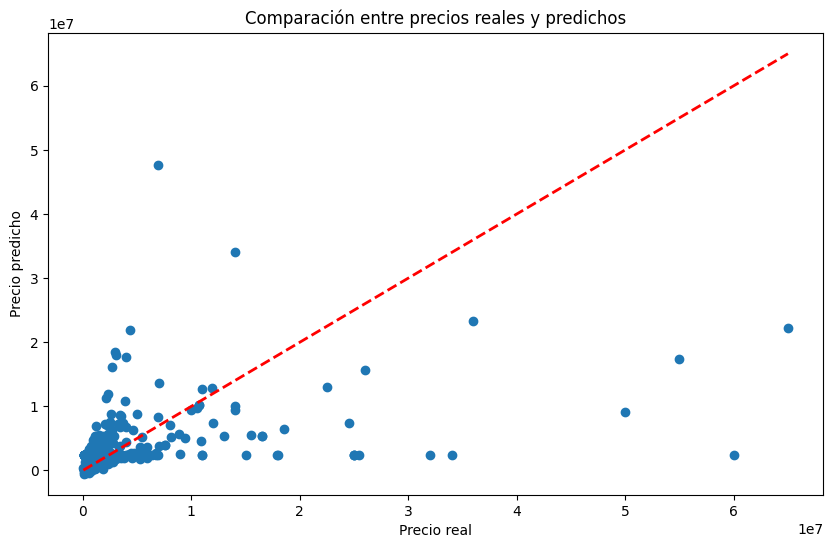

In [ ]:
# Graficar la comparación entre los precios reales y los predichos
plt.figure(figsize=(10, 6))  # Definir tamaño de la figura
plt.scatter(y_test, y_pred)  # Gráfica de dispersión entre precios reales y predichos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia diagonal
plt.xlabel('Precio real')  # Etiqueta del eje X
plt.ylabel('Precio predicho')  # Etiqueta del eje Y
plt.title('Comparación entre precios reales y predichos')  # Título de la gráfica
plt.show()  # Mostrar la gráfica


La gráfica compara precios reales con predichos por el modelo, y mientras más lejos están los puntos de la línea roja, más errores hay, el modelo predice bien los precios bajos porque muchos puntos están cerca del origen, pero para precios altos le cuesta más y suele subestimarlos, ya que los puntos quedan abajo de la línea, además, los errores aumentan con los precios altos, lo que sugiere que el modelo necesita ajustes para mejorar su precisión

## Posible explicación:

- Puede haber relaciones no lineales entre las variables que una regresión lineal no captura.
- Podrían faltar variables importantes que influyen en el precio de las casas.
- Podría haber outliers o datos ruidosos que afectan el rendimiento del modelo.

## Pasos a seguir:
1. Explorar más a fondo los datos para entender mejor las relaciones entre variables.
2. Considerar la inclusión de más características relevantes si están disponibles.
3. Probar técnicas de preprocesamiento como la normalización o la eliminación de outliers.
4. Experimentar con modelos más complejos que puedan capturar relaciones no lineales.

# OTRO MODELO

Seleccionar características relevantes

# Random Forest

## Qué es

**Random Forest** es un algoritmo de aprendizaje supervisado que pertenece a la familia de métodos de conjunto (ensemble). Funciona creando múltiples árboles de decisión y combinando sus resultados para obtener una predicción más precisa y estable.

## Para qué sirve

1. Predicción: Puede utilizarse tanto para problemas de clasificación como de regresión.

2. Selección de características: Ayuda a identificar las variables más importantes en un conjunto de datos.

3. Manejo de datos faltantes: Es capaz de manejar eficientemente conjuntos de datos con valores faltantes.

4. Reducción del sobreajuste: Al combinar múltiples árboles, reduce el riesgo de sobreajuste común en los árboles de decisión individuales.

5. Estimación de la importancia de variables: Proporciona una medida de la importancia relativa de cada característica en la predicción.

## En qué casos se utiliza

Random Forest se aplica en diversos campos y situaciones, como:

1. Finanzas:
   - Detección de fraudes bancarios
   - Predicción de riesgos crediticios
   - Análisis de mercados financieros

2. Medicina y salud:
   - Diagnóstico de enfermedades
   - Predicción de la sensibilidad a medicamentos
   - Análisis de imágenes médicas

3. Marketing y comercio electrónico:
   - Predicción del comportamiento de los clientes
   - Segmentación de mercado
   - Recomendación de productos

4. Ciencias ambientales:
   - Predicción del clima
   - Análisis de patrones ecológicos
   - Evaluación de riesgos ambientales

5. Reconocimiento de imágenes y voz:
   - Clasificación de imágenes
   - Reconocimiento de patrones en señales de audio

6. Recursos humanos:
   - Predicción de la rotación de empleados
   - Evaluación del desempeño laboral

7. Industria y manufactura:
   - Predicción de fallos en equipos
   - Optimización de procesos de producción

**Random Forest** es especialmente útil cuando se trabaja con conjuntos de datos grandes y complejos, con muchas variables y posibles interacciones entre ellas. Su capacidad para manejar tanto variables numéricas como categóricas, así como su robustez frente al ruido en los datos, lo hacen una opción popular en muchos campos de aplicación.



In [ ]:
# Definir las características (features) y la variable objetivo
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'TYPE']  # Variables predictoras
X = df[features]  # Seleccionar las columnas de características
y = df['PRICE']  # Variable objetivo (precio)


In [ ]:
# Codificar variables categóricas
X = pd.get_dummies(X, columns=['TYPE'])

In [ ]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Random Forest Regressor, que puede capturar relaciones no lineales y manejar múltiples variables.

In [ ]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Definir el modelo con 100 árboles
rf_model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento


RandomForestRegressor(random_state=42)

In [ ]:
# Hacer predicciones
y_pred = rf_model.predict(X_test)


El MSE y R² ayudan a evaluar el rendimiento del modelo.

In [ ]:
# Calcular métricas de rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente R²

# Imprimir los resultados
print(f'Error cuadrático medio: {mse}')
print(f'R-cuadrado: {r2}')


Error cuadrático medio: 9974277469753.936
R-cuadrado: 0.6041141874171588


Interpretación:

- Error cuadrático medio (MSE): 9974277469753.936

El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un valor más bajo indica mejores predicciones.

En este caso, el MSE es bastante alto, pero es **significativamente menor** que el obtenido con el modelo de regresión lineal anterior (19243479524898.84). Esto indica una mejora sustancial en la precisión de las predicciones. Sin embargo, el valor sigue siendo grande debido a la escala de los precios de las casas.

- R-cuadrado (R²): 0.6041141874171588

El R² indica qué proporción de la varianza en la variable dependiente (precio de venta) es predecible a partir de las variables independientes (características de la casa). Varía de 0 a 1, donde 1 indica una predicción perfecta.

Un R² de aproximadamente 0.604 significa que el modelo explica alrededor del 60.4% de la variabilidad en los precios de las casas. Esto es una mejora significativa respecto al modelo de regresión lineal anterior (que tenía un R² de 0.236).

Interpretación general:

1. Mejora significativa: El modelo Random Forest ha mejorado considerablemente respecto al modelo de regresión lineal anterior, tanto en términos de MSE como de R².
2. Poder predictivo moderado: El modelo puede explicar aproximadamente el 60% de la variabilidad en los precios de las casas, lo cual es bastante bueno para datos inmobiliarios que suelen ser complejos.
3. Margen de mejora: Aunque el modelo es mucho mejor, todavía hay un 40% de la variabilidad que no se explica, lo que sugiere que podrían existir otros factores importantes que no se están considerando o que la relación entre las variables podría ser aún más compleja.
4. Utilidad práctica: Con un R² de 0.604, el modelo puede ser útil para obtener estimaciones aproximadas de los precios de las casas, aunque no será perfecto en sus predicciones.
5. Complejidad del mercado inmobiliario: Los resultados reflejan la complejidad inherente al mercado inmobiliario, donde muchos factores, algunos difíciles de cuantificar, pueden influir en los precios.

En resumen, el modelo Random Forest ha proporcionado una mejora sustancial en la capacidad predictiva comparado con el modelo de regresión lineal anterior. Sin embargo, aún hay margen para mejorar, posiblemente mediante la inclusión de más variables relevantes, el ajuste de hiperparámetros del modelo, o la consideración de otros algoritmos de aprendizaje automático.

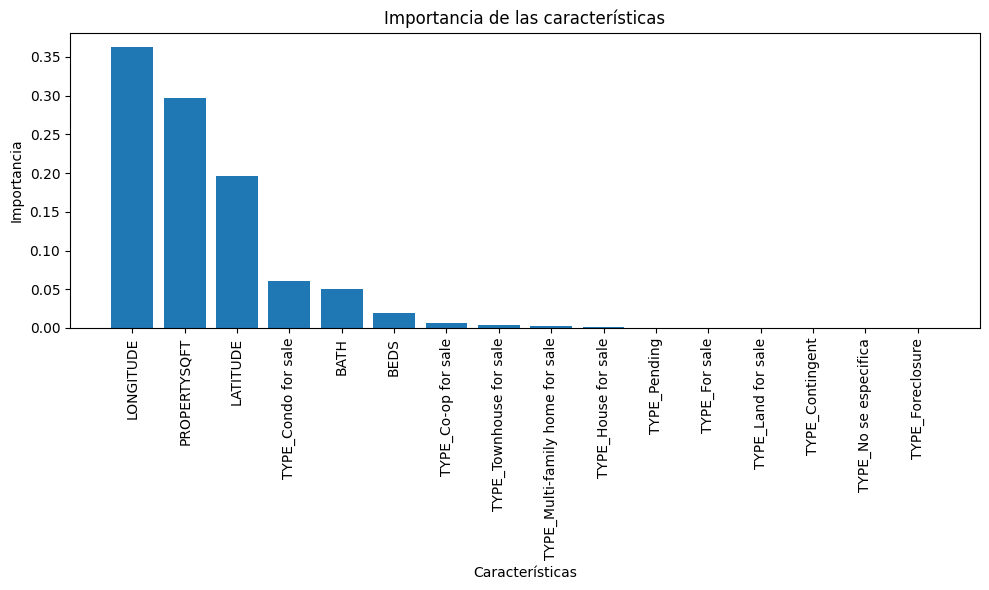

In [ ]:
# Visualizar la importancia de las características en el modelo Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Nombres de las características
    'importance': rf_model.feature_importances_  # Importancia calculada por el modelo
})

# Ordenar las características por su importancia de mayor a menor
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])  # Gráfica de barras
plt.title('Importancia de las características')  # Título
plt.xlabel('Características')  # Etiqueta del eje X
plt.ylabel('Importancia')  # Etiqueta del eje Y
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para que no se encimen
plt.tight_layout()  # Ajustar diseño para evitar que se corte algo
plt.show()  # Mostrar la gráfica



La gráfica muestra que la ubicación y el tamaño son lo más importante para predecir precios, ya que la LONGITUDE, LATITUDE y PROPERTYSQFT destacan, los BATH (baños) y BEDS (habitaciones) ayudan, pero menos, las variables sobre tipo de propiedad casi no influyen, y algunas como TYPE_Pending o TYPE_Foreclosure aportan muy poco, en general, la ubicación y el tamaño son los principales factores que determinan el precio